In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pywt

##### Function to read frames (grayscale) from a video into an array

In [3]:
def frames_extract_array(video_path) :
    frames_arr = []
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    fps = cap.get(cv2.CAP_PROP_FPS)
    # Loop through the video frames
    while cap.isOpened():
        ret, frame = cap.read()     # ret = true if frame returnd, else false
        # Check if a frame was successfully read
        if not ret:
            print("Completed frame extraction")
            break
        else :
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames_arr.append(frame)
        frame_count += 1
    # Release the video capture object
    cap.release()
    print(f'Total frames extracted: {frame_count}')
    frames_arr = np.array(frames_arr)
    return frames_arr, fps

##### Define all the Kernels for Edge Extraction

In [4]:
# Prewitt Operator
gp_x = np.array([[-1, 0, 1],
                [-1, 0, 1],
                [-1, 0, 1]]) 

gp_y = np.array([[-1, -1, -1],
                [0, 0, 0],
                [1, 0, 1]]) 

In [5]:
# Sobel Operator
gs_x = np.array([[-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]]) 

gs_y = np.array([[1, 2, 1],
                [0, 0, 0],
                [-1, -2, -1]]) 

In [6]:
# Kirsch Operator
gk_1 = np.array([[5, 5, 5],
                [-3, 0, -3],
                [-3, -3, -3]]) 

gk_2 = np.array([[5, 5, -3],
                [5, 0, -3],
                [-3, -3, -3]]) 

gk_3 = np.array([[5, -3, -3],
                [5, 0, -3],
                [5, -3, -3]]) 

gk_4 = np.array([[-3, -3, -3],
                [5, 0, -3],
                [5, 5, -3]]) 

gk_5 = np.array([[-3, -3, -3],
                [-3, 0, -3],
                [5, 5, 5]]) 

gk_6 = np.array([[-3, -3, -3],
                [-3, 0, 5],
                [-3, 5, 5]])  

gk_7 = np.array([[-3, -3, 5],
                [-3, 0, 5],
                [-3, -3, 5]])  

gk_8 = np.array([[-3, 5, 5],
                [-3, 0, 5],
                [-3, -3, -3]]) 

##### Functions for Calculating Edge Intensity Metric using Edge Detectors

In [7]:
# Prewitt

def Prewitt_edge_detection(frame, threshold = 1200):
    frame_float = frame.astype(np.float32)  # Convert to float32 for calculations

    d1 = cv2.filter2D(frame_float, -1, gp_x)
    d2 = cv2.filter2D(frame_float, -1, gp_y)

    dA = (d1**2 + d2**2)**0.5

    # Apply thresholding to get binary edge map
    binary_edge_map = dA > threshold
    return binary_edge_map.astype(int)

def edge_intensity_Prewitt(frame, threshold = 1200) :
    binary_map = Prewitt_edge_detection(frame, threshold)

    count = 0
    count = np.sum(binary_map == 1)

    height, width = binary_map.shape[:2]
    total_pixels = height * width
    edge_intensity = count/total_pixels

    return edge_intensity

In [8]:
# Sobel

def Sobel_edge_detection(frame, threshold = 1200):
    frame_float = frame.astype(np.float32)  # Convert to float32 for calculations

    d1 = cv2.filter2D(frame_float, -1, gs_x)
    d2 = cv2.filter2D(frame_float, -1, gs_y)

    dA = (d1**2 + d2**2)**0.5

    # Apply thresholding to get binary edge map
    binary_edge_map = dA > threshold
    return binary_edge_map.astype(int)

def edge_intensity_Sobel(frame, threshold = 1200) :
    binary_map = Sobel_edge_detection(frame, threshold)

    count = 0
    count = np.sum(binary_map == 1)

    height, width = binary_map.shape[:2]
    total_pixels = height * width
    edge_intensity = count/total_pixels

    return edge_intensity

In [9]:
# Kirsch

def Kirsch_edge_detection(frame, threshold = 1200):
    frame_float = frame.astype(np.float32)  # Convert to float32 for calculations

    d1 = cv2.filter2D(frame_float, -1, gk_1)
    d2 = cv2.filter2D(frame_float, -1, gk_2)
    d3 = cv2.filter2D(frame_float, -1, gk_3)
    d4 = cv2.filter2D(frame_float, -1, gk_4)
    d5 = cv2.filter2D(frame_float, -1, gk_5)
    d6 = cv2.filter2D(frame_float, -1, gk_6)
    d7 = cv2.filter2D(frame_float, -1, gk_7)
    d8 = cv2.filter2D(frame_float, -1, gk_8)

    dA = (d1**2 + d2**2 + d3**2 + d4**2 + d5**2 + d6**2 + d7**2 + d8**2)**0.5

    # Apply thresholding to get binary edge map
    binary_edge_map = dA > threshold
    return binary_edge_map.astype(int)


def edge_intensity_Kirsch(frame, threshold = 1200) :
    binary_map = Kirsch_edge_detection(frame, threshold)

    count = 0
    count = np.sum(binary_map == 1)

    height, width = binary_map.shape[:2]
    total_pixels = height * width
    edge_intensity = count/total_pixels

    return edge_intensity

##### Function for Calculating Edge Intensity Metric using Wavelet Transform

In [10]:
# Function to perform edge detection using wavelet transform
def wavelet_edge_detection(image, threshold, wavelet='haar'):
    # Perform 2D wavelet transform using the specified wavelet
    coeffs2 = pywt.dwt2(image, wavelet)
    LL, (LH, HL, HH) = coeffs2
    
    # Calculate the magnitude of the wavelet detail coefficients
    edge_magnitude = np.sqrt(LH**2 + HL**2 + HH**2)
    
    # Normalize the edge magnitude to range [0, 1]
    edge_magnitude /= edge_magnitude.max()
    # print(edge_magnitude)
    # Apply thresholding to get binary edge map
    binary_edge_map = edge_magnitude > threshold
    return binary_edge_map.astype(int)

def edge_intensity_wavelet(frame, threshold) :
    frame_float = frame.astype(np.float32)  # Convert to float32 for calculations
    wavelet_decomp = wavelet_edge_detection(frame_float, threshold)
    count = 0
    count = np.sum(wavelet_decomp == 1)
    height, width = wavelet_decomp.shape[:2]
    total_pixels = height * width
    edge_intensity = count/total_pixels

    return edge_intensity


##### Up Converted Rate Detection

In [11]:
# Function to calculate the Efficiency Coefficient (E_k)
def calculate_efficiency_coefficient(edge_intensities, len_window):
    efficiency_coeffs = []
    for k in range(len_window, len(edge_intensities)):
        direction = abs(edge_intensities[k] - edge_intensities[k - len_window])
        volatility = sum(abs(edge_intensities[i] - edge_intensities[i - 1]) for i in range(k - len_window + 1, k + 1))
        efficiency_coeff = direction / volatility if volatility != 0 else 0
        efficiency_coeffs.append(efficiency_coeff)
    return efficiency_coeffs

In [12]:
# Function to calculate the Kaufman Adaptive Moving Average (KAMA)
def calculate_kama(edge_intensities, len_window, fast_len=2, slow_len=30):
    KAMA = np.zeros(len(edge_intensities))
    efficiency_coeffs = calculate_efficiency_coefficient(edge_intensities, len_window)
    
    # Initial AMA value is set to the first edge intensity value
    KAMA[0] = edge_intensities[0]
    
    # Calculate KAMA iteratively
    for k in range(1, len(edge_intensities)):
        E_k = efficiency_coeffs[k - len_window] if k >= len_window else 1  # Efficiency coefficient
        c_k = E_k * (2 / (fast_len + 1)) + (1 - E_k) * (2 / (slow_len + 1))  # Smoothing factor
        
        # KAMA calculation
        KAMA[k] = KAMA[k - 1] + c_k * (edge_intensities[k] - KAMA[k - 1])
    
    return KAMA

In [13]:
# Function to classify frames based on the edge intensity and KAMA
def classify_frames(edge_intensities, kama):
    classifications = []
    for i in range(len(edge_intensities)):
        if edge_intensities[i] < kama[i]:
            classifications.append('interpolated')
        else:
            classifications.append('original')
    return classifications

In [14]:
def plot_classification(classifications, n_frames):
    
    # Create the plot
    plt.figure(figsize=(6, 4))
    frame_numbers = np.arange(1, n_frames+1)
    plt.plot(frame_numbers, classifications[:n_frames], 'o-', color='purple', markersize=5, label='Binary Classification')
    plt.axhline(y=1, color='k', linestyle='--', linewidth=0.5)  # Optional dashed line at y=1
    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)  # Optional dashed line at y=0
    
    # Customize the plot
    plt.xlabel('Frame number', fontsize=12)
    plt.ylabel('Binary classifications', fontsize=12)
    plt.title('Binary classification of candidate video frames', fontsize=14)
    plt.xticks(np.arange(0, 61, 10))  # X-axis ticks at intervals of 10
    plt.yticks([0, 1])  # Y-axis only shows 0 and 1
    plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [15]:
# Function to estimate the original frame rate
def estimate_original_frame_rate(frame_rate_after_fruc, classifications):
    total_frames = len(classifications)
    interpolated_frames = classifications.count('interpolated')
    original_frame_rate = frame_rate_after_fruc * (1 - interpolated_frames / total_frames)
    return original_frame_rate

In [16]:
def detect_up_converted_rate(edge_intensities, frame_rate_after_fruc, len_window=10, fast_len=10, slow_len=30):
    # Step 1: Calculate KAMA
    kama = calculate_kama(edge_intensities, len_window, fast_len, slow_len)
    
    # Step 2: Classify frames as interpolated or original
    classifications = classify_frames(edge_intensities, kama)

    # plot_classification(classifications, )

    # Step 3: Estimate the original frame rate
    original_frame_rate = estimate_original_frame_rate(frame_rate_after_fruc, classifications)
    
    return original_frame_rate, classifications

##### Function to plot edge_intensity vs frame index

In [17]:
# Plot for original and upscaled videos on same plane
def plot_edge_intensity_combined(edge_intensity_arr_original, edge_intensity_arr_upscaled,n=-1):
    indices1 = range(len(edge_intensity_arr_original))
    indices2 = range(len(edge_intensity_arr_upscaled))

    plt.figure(figsize=(10, 6))

    plt.plot(indices1[:n], edge_intensity_arr_original[:n], label='Original video Edge Intensity', color='blue')
    plt.plot(indices2[:n], edge_intensity_arr_upscaled[:n], label='Upscaled video Edge Intensity', color='green')

    plt.title('Edge Intensities vs Frame Index')
    plt.xlabel('Frame Index')
    plt.ylabel('Edge Intensity')
    plt.grid(True)
    plt.legend()
    plt.show() 

In [18]:
def plot_image(image, binary_edges) :

    # Plot the original image and the binary edge map side by side
    plt.figure(figsize=(12, 6))

    # Subplot 1: Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')  # Turn off axis

    # Subplot 2: Binary Edge Map
    plt.subplot(1, 2, 2)
    plt.imshow(binary_edges, cmap='gray')
    plt.title("Edge Detection Result")
    plt.axis('off')  # Turn off axis
    # Show both plots
    plt.show()

##### Functions for Upconversion Detection using Various Schemes

In [19]:
# Prewitt Operator

def calc_edge_intensity_Prewitt(original_frame_arr, upconverted_frame_arr, threshold=10) :
    # Calculate edge intensity values for each frame in original video
    edge_intensity_original_arr = np.array([])
    for frame in original_frame_arr :
        edge_intensity_val = edge_intensity_Prewitt(frame, threshold)
        edge_intensity_original_arr = np.append(edge_intensity_original_arr, edge_intensity_val)

    # Calculate edge intensity values for each frame in upconverted video
    edge_intensity_upconverted_arr = np.array([])
    for frame in upconverted_frame_arr :
        edge_intensity_val = edge_intensity_Prewitt(frame, threshold)
        edge_intensity_upconverted_arr = np.append(edge_intensity_upconverted_arr, edge_intensity_val)

    return edge_intensity_original_arr, edge_intensity_upconverted_arr 


In [20]:
# Sobel Operator

def calc_edge_intensity_Sobel(original_frame_arr, upconverted_frame_arr, threshold=100) :
    # Calculate edge intensity values for each frame in original video
    edge_intensity_original_arr = np.array([])
    for frame in original_frame_arr :
        edge_intensity_val = edge_intensity_Sobel(frame, threshold)
        edge_intensity_original_arr = np.append(edge_intensity_original_arr, edge_intensity_val)

    # Calculate edge intensity values for each frame in upconverted video
    edge_intensity_upconverted_arr = np.array([])
    for frame in upconverted_frame_arr :
        edge_intensity_val = edge_intensity_Sobel(frame, threshold)
        edge_intensity_upconverted_arr = np.append(edge_intensity_upconverted_arr, edge_intensity_val)

    return edge_intensity_original_arr, edge_intensity_upconverted_arr 

In [21]:
# Kirsch Operator

def calc_edge_intensity_Kirsch(original_frame_arr, upconverted_frame_arr, threshold=100) :
    # Calculate edge intensity values for each frame in original video
    edge_intensity_original_arr = np.array([])
    for frame in original_frame_arr :
        edge_intensity_val = edge_intensity_Kirsch(frame, threshold)
        edge_intensity_original_arr = np.append(edge_intensity_original_arr, edge_intensity_val)

    # Calculate edge intensity values for each frame in upconverted video
    edge_intensity_upconverted_arr = np.array([])
    for frame in upconverted_frame_arr :
        edge_intensity_val = edge_intensity_Kirsch(frame, threshold)
        edge_intensity_upconverted_arr = np.append(edge_intensity_upconverted_arr, edge_intensity_val)

    return edge_intensity_original_arr, edge_intensity_upconverted_arr 

In [22]:
# Wavelet Transform

def calc_edge_intensity_wavelet(original_frame_arr, upconverted_frame_arr, threshold=100) :
    # Calculate edge intensity values for each frame in original video
    edge_intensity_original_arr = np.array([])
    for frame in original_frame_arr :
        edge_intensity_val = edge_intensity_wavelet(frame, threshold)
        edge_intensity_original_arr = np.append(edge_intensity_original_arr, edge_intensity_val)

    # Calculate edge intensity values for each frame in upconverted video
    edge_intensity_upconverted_arr = np.array([])
    for frame in upconverted_frame_arr :
        edge_intensity_val = edge_intensity_wavelet(frame, threshold)
        edge_intensity_upconverted_arr = np.append(edge_intensity_upconverted_arr, edge_intensity_val)

    return edge_intensity_original_arr, edge_intensity_upconverted_arr 

##### Template function for entire operation

In [23]:
# Prewitt Operator
def function_Prewitt(original_video_dir, upconverted_video_dir, edge_threshold, binary_classification=True, n_frames=10) :
    
    # Extract frames from original video (grayscale)
    original_frames_arr, fps_original = frames_extract_array(original_video_dir)
    
    # Extract frames from upconverted video (grayscale)
    upconverted_frames_arr, fps_upconverted = frames_extract_array(upconverted_video_dir)
    
    # Calculate frame-by-frame intensity index
    original_edge_intensities, upconverted_edge_intensities = calc_edge_intensity_Prewitt(original_frames_arr, upconverted_frames_arr, edge_threshold)
    
    # Plot intensities of original and upconverted videos in single array
    plot_edge_intensity_combined(original_edge_intensities, upconverted_edge_intensities)

    original_frame_rate, classifications = detect_up_converted_rate(upconverted_edge_intensities, fps_upconverted)

    if(binary_classification) :
        plot_classification(classifications, n_frames)

    print(f"Up Converted Frame Rate: {fps_upconverted:.4f} fps")
    print(f"Estimated Original Frame Rate: {original_frame_rate:.4f} fps")
    print(f"Expected Original Frame Rate: {fps_original:.4f} fps")

In [24]:
# Sobel Operator
def function_Sobel(original_video_dir, upconverted_video_dir, edge_threshold, binary_classification=True, n_frames=10) :
    
    # Extract frames from original video (grayscale)
    original_frames_arr, fps_original = frames_extract_array(original_video_dir)
    
    # Extract frames from upconverted video (grayscale)
    upconverted_frames_arr, fps_upconverted = frames_extract_array(upconverted_video_dir)
    
    # Calculate frame-by-frame intensity index
    original_edge_intensities, upconverted_edge_intensities = calc_edge_intensity_Sobel(original_frames_arr, upconverted_frames_arr, edge_threshold)
    
    # Plot intensities of original and upconverted videos in single array
    plot_edge_intensity_combined(original_edge_intensities, upconverted_edge_intensities)
    
    # Estimate frame rate of original video
    original_frame_rate, classifications = detect_up_converted_rate(upconverted_edge_intensities, fps_upconverted)

    if(binary_classification) :
        plot_classification(classifications, n_frames)

    print(f"Up Converted Frame Rate: {fps_upconverted:.4f} fps")
    print(f"Estimated Original Frame Rate: {original_frame_rate:.4f} fps")
    print(f"Expected Original Frame Rate: {fps_original:.4f} fps")

In [25]:
# Kirsch Operator
def function_Kirsch(original_video_dir, upconverted_video_dir, edge_threshold, binary_classification=True, n_frames = 10) :
    
    # Extract frames from original video (grayscale)
    original_frames_arr, fps_original = frames_extract_array(original_video_dir)
    
    # Extract frames from upconverted video (grayscale)
    upconverted_frames_arr, fps_upconverted = frames_extract_array(upconverted_video_dir)
    
    # Calculate frame-by-frame intensity index
    original_edge_intensities, upconverted_edge_intensities = calc_edge_intensity_Kirsch(original_frames_arr, upconverted_frames_arr, edge_threshold)
    
    # Plot intensities of original and upconverted videos in single array
    plot_edge_intensity_combined(original_edge_intensities, upconverted_edge_intensities)
    
    # Estimate frame rate of original video
    original_frame_rate, classifications = detect_up_converted_rate(upconverted_edge_intensities, fps_upconverted)

    if(binary_classification) :
        plot_classification(classifications, n_frames)
    
    print(f"Up Converted Frame Rate: {fps_upconverted:.4f} fps")
    print(f"Estimated Original Frame Rate: {original_frame_rate:.4f} fps")
    print(f"Expected Original Frame Rate: {fps_original:.4f} fps")

In [26]:
# Wavelet Transform
def function_wavelet(original_video_dir, upconverted_video_dir, edge_threshold, binary_classification=True, n_frames = 10) :
    
    # Extract frames from original video (grayscale)
    original_frames_arr, fps_original = frames_extract_array(original_video_dir)
    
    # Extract frames from upconverted video (grayscale)
    upconverted_frames_arr, fps_upconverted = frames_extract_array(upconverted_video_dir)
    
    # Calculate frame-by-frame intensity index
    original_edge_intensities, upconverted_edge_intensities = calc_edge_intensity_wavelet(original_frames_arr, upconverted_frames_arr, edge_threshold)
    
    # Plot intensities of original and upconverted videos in single array
    plot_edge_intensity_combined(original_edge_intensities, upconverted_edge_intensities)
    
    # Estimate frame rate of original video
    original_frame_rate, classifications = detect_up_converted_rate(upconverted_edge_intensities, fps_upconverted)

    if(binary_classification) :
        plot_classification(classifications, n_frames)

    print(f"Up Converted Frame Rate: {fps_upconverted:.4f} fps")
    print(f"Estimated Original Frame Rate: {original_frame_rate:.4f} fps")
    print(f"Expected Original Frame Rate: {fps_original:.4f} fps")

##### Test on video

In [33]:
# Enter path of video to be tested 

original_video_path = r"E:\IITR-Acads\Sem5\ECN-316\WhatsApp Video 2024-12-01 at 10.27.50_1451ffa0.mp4"    # Path of original video
upconverted_video_path = r"E:\IITR-Acads\Sem5\ECN-316\WhatsApp Video 2024-12-01 at 10.19.30_5fe40cd9.mp4"   # Path of upconverted video

Completed frame extraction
Total frames extracted: 991
Completed frame extraction
Total frames extracted: 1988


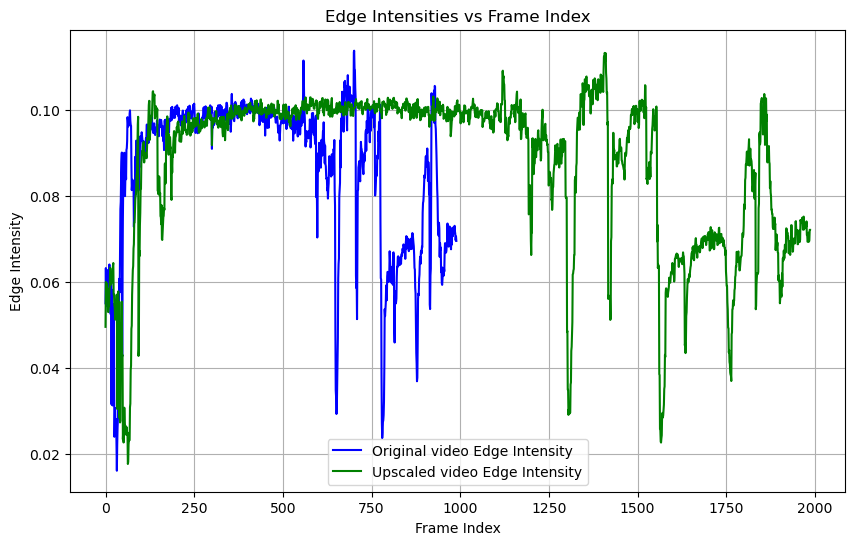

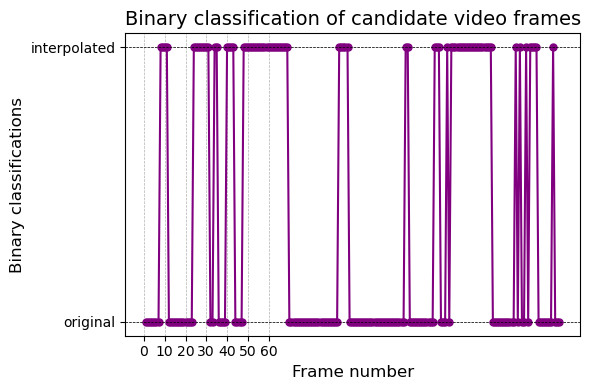

Up Converted Frame Rate: 30.0002 fps
Estimated Original Frame Rate: 17.2788 fps
Expected Original Frame Rate: 29.9164 fps


In [ ]:
edge_threshold = 0.10           # Threshold for classifying as edge pixel
binary_classification = True    # Set true to display frame classification result, false otherwise
n_frames = 200                  # Number of frames to display in the classification plot

# Select operator to be used from one of the template functions defined above in template section
function_wavelet(original_video_path, upconverted_video_path, edge_threshold, binary_classification, n_frames)